In [162]:
import numpy as np
import matplotlib.pyplot as plt

In [167]:
# Define polarization state
# x_mag and y_mag both describe electric fields magnitudes. They are measured in V/m or N/kg
A = np.sqrt(4/8)            # AND HERE (note if A > 1 the program falls apart. Don't do that.)
phi_x = np.deg2rad(30)      # AND HERE
phi_y = np.deg2rad(75)      # AND HERE


B = np.sqrt(1 - A**2)       # We know A^2 + B^2 = 1, so B is completely defined

x_mag = A   # Technically these should be multiplied by E_eff, but since we're just looking for the shape and
y_mag = B   # not the actual number of the magnitudes of electric field, E_eff doesn't matter. It's set equal to 1.

$\mathbf{E}(z,t) = \left(E_x e^{i\phi_x}\hat{x} + E_y e^{i\phi_y}\hat{y}\right)e^{i(kz-\omega t)}$

Since our goal is to create a static 3D graph, we will freeze time at $t=0$.

$\mathbf{E}(z,t) = \left( E_x e^{i\phi_x}\hat{x} + E_y e^{i\phi_y} \hat{y} \right) e^{ikz}$

In [168]:
# Constant declaration
wavelength = 520e-9
k = 2*np.pi/wavelength

# Linspace, designed such that kz_min = 0  and kz_max = n*pi... see markdown below for explanation
n = 3
z_max = n*wavelength

div = 200  # Specifies the divisions of z
z = np.linspace(0,z_max,div)

I want a graph with $n$ periods/wavelengths, so if we expand $\mathbf{E}(z)$:

$\mathbf{E}(z) = \left( E_x e^{i\phi_x}\hat{x} + E_y e^{i\phi_y} \hat{y} \right) \left[\cos(kz) + i\sin(kz)\right]$

We see the periodic behavior clearly from the trigonometric functions. Starting at $z=0$, the wave completes a full period at $kz = 2\pi$. For 5 wavelengths, we thus need $0 \leq kz \leq 10\pi$. Substituting $k = \tfrac{2\pi}{\lambda}$, we find $z_{max} = n\lambda$

In [169]:
# 3D graphing calculations
E = np.array([x_mag*np.e**(1j*(k*z + phi_x)), y_mag*np.e**(1j*(k*z + phi_y))])
E_x = E[0].real
E_y = E[1].real

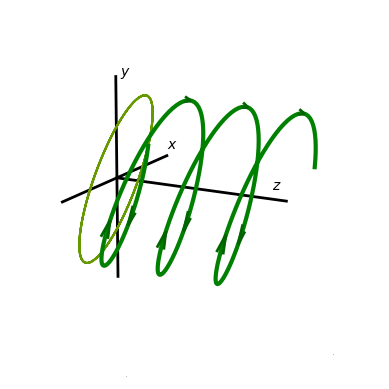

In [170]:
# Create a 3D plot
fig = plt.figure('equal')
ax = fig.add_subplot(111, projection='3d')

# Set background cube to white 
ax.zaxis.set_pane_color((1, 1, 1, 1))
ax.xaxis.set_pane_color((1, 1, 1, 1))
ax.yaxis.set_pane_color((1, 1, 1, 1))

# Make original axes lines white
ax.zaxis.line.set_color((1, 1, 1))
ax.xaxis.line.set_color((1, 1, 1))
ax.yaxis.line.set_color((1, 1, 1))

# Ensure x- and y- axes are scaled the same, so our ellipses are true to scale
if (x_mag >= y_mag):
    lim = (-1.4*x_mag, 1.4*x_mag)
else:
    lim = (-1.4*y_mag, 1.4*y_mag)

ax.set_ylim(lim)
ax.set_zlim(lim)

# Hide the axis labels
ax.set_xlabel('z', size=0)
ax.set_ylabel('x', size=0)
ax.set_zlabel('y', size=0)

# Make new labels
ax.text(9*z_max/10, max(E_x)/10, max(E_y)/10, "$z$", color='black')
ax.text(0, lim[1], 0.1*max(E_x), "$x$", color='black')
ax.text(0, 0.1*max(E_x), lim[1], "$y$", color='black')

# Remove gridlines and don't show numbers on axes
plt.gca().xaxis.set_ticks([])
plt.gca().yaxis.set_ticks([])
plt.gca().zaxis.set_ticks([])



# Ensures square gridlines for x- and y-axes (x and y need to be scaled the same for circles to not be ellipses)
ax.set_box_aspect([1,1,1])

# Draw new axes lines passing through the origin (this has to be at the end for stuff to look right)
ax.plot([0, max(abs(z))], [0, 0], [0, 0], color='black', linewidth=2)  # x-axis
ax.plot([0, 0], lim, [0, 0], color='black', linewidth=2)  # y-axis
ax.plot([0, 0], [0, 0], lim, color='black', linewidth=2)  # z-axis


# Plot the 2D curve on the xy-plane at z=0
ax.plot(E_x, E_y, zs=0, zdir='x', color=(0.4, 0.6, 0))

# Plot the curve with deep green color
ax.plot(z, E_x, E_y, color='green', linewidth=3)



# ARROWS ON CURVE 1: Specify the indices where you want to place arrows
num_arrows = 3*int(np.floor(n))
arrow_indices = []

for i in range(num_arrows):
    arrow_indices.append(int((i) * div/num_arrows) + 10)

# ARROWS ON CURVE 2: Create lists to store coordinates and directions for arrows
arrow_coords = []
arrow_directions = []

for idx in arrow_indices:
    arrow_coords.append((z[idx], E_x[idx], E_y[idx]))  # Coordinates of arrow starting point
    arrow_directions.append((z[idx+1]-z[idx], E_x[idx+1]-E_x[idx], E_y[idx+1]-E_y[idx]))  # Direction of arrow

# ARROWS ON CURVE 3: Add arrows at specified coordinates and directions
scalefactor = 1
for coord, direction in zip(arrow_coords, arrow_directions):
    ax.quiver(*coord, *direction, color='darkgreen', length=.5*scalefactor, arrow_length_ratio=5,linewidth=2)



# Change viewing angle
ax.view_init(elev=15, azim=-62)


#plt.savefig("3D_polarization.png", bbox_inches='tight', pad_inches=0.01)

plt.show()